# Introduction

In this notebook, we implement [YOLOv4](https://arxiv.org/pdf/2004.10934.pdf) for training on your own dataset in PyTorch.

We also recommend reading our blog post on [Training YOLOv4 on custom data](https://blog.roboflow.ai/training-yolov4-on-a-custom-dataset/) side by side.

We will take the following steps to implement YOLOv4 on our custom data:
* Set up YOLOv4 environment
* Download Custom Dataset via Roboflow
* Train Custom YOLOv4 detector
* Reload Custom YOLOv4 detector weights for inference

When you are done you will have a custom detector that you can use. It will make inference like this:

#### ![Chesse Image](https://i.imgur.com/cGOxffX.png)


# Set up YOLOv4 Environment

In [1]:
!git clone https://github.com/roboflow-ai/pytorch-YOLOv4.git

Cloning into 'pytorch-YOLOv4'...
remote: Enumerating objects: 398, done.
remote: Total 398 (delta 0), reused 0 (delta 0), pack-reused 398
Receiving objects: 100% (398/398), 926.53 KiB | 10.41 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [ ]:
%cd /content/pytorch-YOLOv4
!pip install -r requirements.txt
# This restarts the runtime--ignore any error messages
import os
os.kill(os.getpid(), 9)

In [2]:
# download yolov4 weights that have already been converted to PyTorch
%cd /content/pytorch-YOLOv4/cfg/
!gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA

/content/pytorch-YOLOv4/cfg
Downloading...
From: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
To: /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth
170MB [00:01, 86.4MB/s]


# Download Custom Dataset

## Export Your Dataset from Roboflow

Roboflow enables you to export your dataset in any format you need - including for this notebook.

Create a [free account](https://app.roboflow.ai). Upload your private dataset. Generate a version (applying any preprocessing and augmentations you desire). Create an export. Select **YOLOv4 PyTorch** as the export format. Click **"Show Download code"**, copy your link, and paste it in the next cell. Magic.

In [9]:
%cd /content/
# REPLACE this link with your Roboflow dataset (export as YOLOv4 PyTorch format)
!curl -L "https://app.roboflow.com/ds/S3i93ejgbh?key=UiNjT9hXx5" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1445      0 --:--:-- --:--:-- --:--:--  1442
100 16.4M  100 16.4M    0     0  5742k      0  0:00:02  0:00:02 --:--:-- 14.8M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/0b47311f426ff926578c9d738d683e76_jpg.rf.6390c71d683f95fd9acc610b42805c09.jpg  
 extracting: test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.21c0284961590c6f48687e2cb99cf912.jpg  
 extracting: test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.21b99253305619c5389eff9f89b85dc5.jpg  
 extracting: test/410993714e325a1de3e394ffe860df3a_jpg.rf.f341ae62cb4224b22d0f3988be4a0e3f.jpg  
 extracting: test/4e3117459d759798537eb52cf5bf534d_jpg.rf.42ac29504f1c1e7cd5efce35c8e143fc.jpg  
 extracting: test/5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.0d3fdd6b31c1f749b4ea7f7a0cad89da.jpg  
 extracting: 

In [11]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
%mkdir data
%cp valid/_annotations.txt data/val.txt
%cp valid/*.jpg train/

mkdir: cannot create directory ‘data’: File exists


In [12]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')

In [13]:
print(num_classes)

13


In [15]:
!pip install tensorboardX

     |████████████████████████████████| 124 kB 11.0 MB/s 


# Train Custom Detector

In [16]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
!python ./pytorch-YOLOv4/train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 50

log file path:log/log_2021-08-06_07-25-21.txt
2021-08-06 07:25:21,990 train.py[line:435] INFO: Using device cuda
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2021-08-06 07:25:32,508 train.py[line:282] INFO: Starting training:
        Epochs:          50
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   606
        Validation size: 58
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 13
        Train label path:train.txt
        Pre

# Load Trained Weights for Custom Detection

You can also use this to load previously saved weights!

In [ ]:
#looking at the weights that our model has saved during training
!ls checkpoints

Yolov4_epoch10.pth  Yolov4_epoch22.pth	Yolov4_epoch34.pth  Yolov4_epoch46.pth
Yolov4_epoch11.pth  Yolov4_epoch23.pth	Yolov4_epoch35.pth  Yolov4_epoch47.pth
Yolov4_epoch12.pth  Yolov4_epoch24.pth	Yolov4_epoch36.pth  Yolov4_epoch48.pth
Yolov4_epoch13.pth  Yolov4_epoch25.pth	Yolov4_epoch37.pth  Yolov4_epoch49.pth
Yolov4_epoch14.pth  Yolov4_epoch26.pth	Yolov4_epoch38.pth  Yolov4_epoch4.pth
Yolov4_epoch15.pth  Yolov4_epoch27.pth	Yolov4_epoch39.pth  Yolov4_epoch50.pth
Yolov4_epoch16.pth  Yolov4_epoch28.pth	Yolov4_epoch3.pth   Yolov4_epoch5.pth
Yolov4_epoch17.pth  Yolov4_epoch29.pth	Yolov4_epoch40.pth  Yolov4_epoch6.pth
Yolov4_epoch18.pth  Yolov4_epoch2.pth	Yolov4_epoch41.pth  Yolov4_epoch7.pth
Yolov4_epoch19.pth  Yolov4_epoch30.pth	Yolov4_epoch42.pth  Yolov4_epoch8.pth
Yolov4_epoch1.pth   Yolov4_epoch31.pth	Yolov4_epoch43.pth  Yolov4_epoch9.pth
Yolov4_epoch20.pth  Yolov4_epoch32.pth	Yolov4_epoch44.pth
Yolov4_epoch21.pth  Yolov4_epoch33.pth	Yolov4_epoch45.pth


In [ ]:
#choose random test image
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

In [ ]:
%%time
##change the epoch here to the one you would like to use for inference
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

white-bishop: 0.999999
black-bishop: 0.999405
black-bishop: 0.999306
black-pawn: 1.000000
white-pawn: 1.000000
black-pawn: 1.000000
black-king: 0.999978
white-king: 0.999680
save plot results to predictions.jpg
CPU times: user 22 ms, sys: 6.02 ms, total: 28 ms
Wall time: 5.53 s


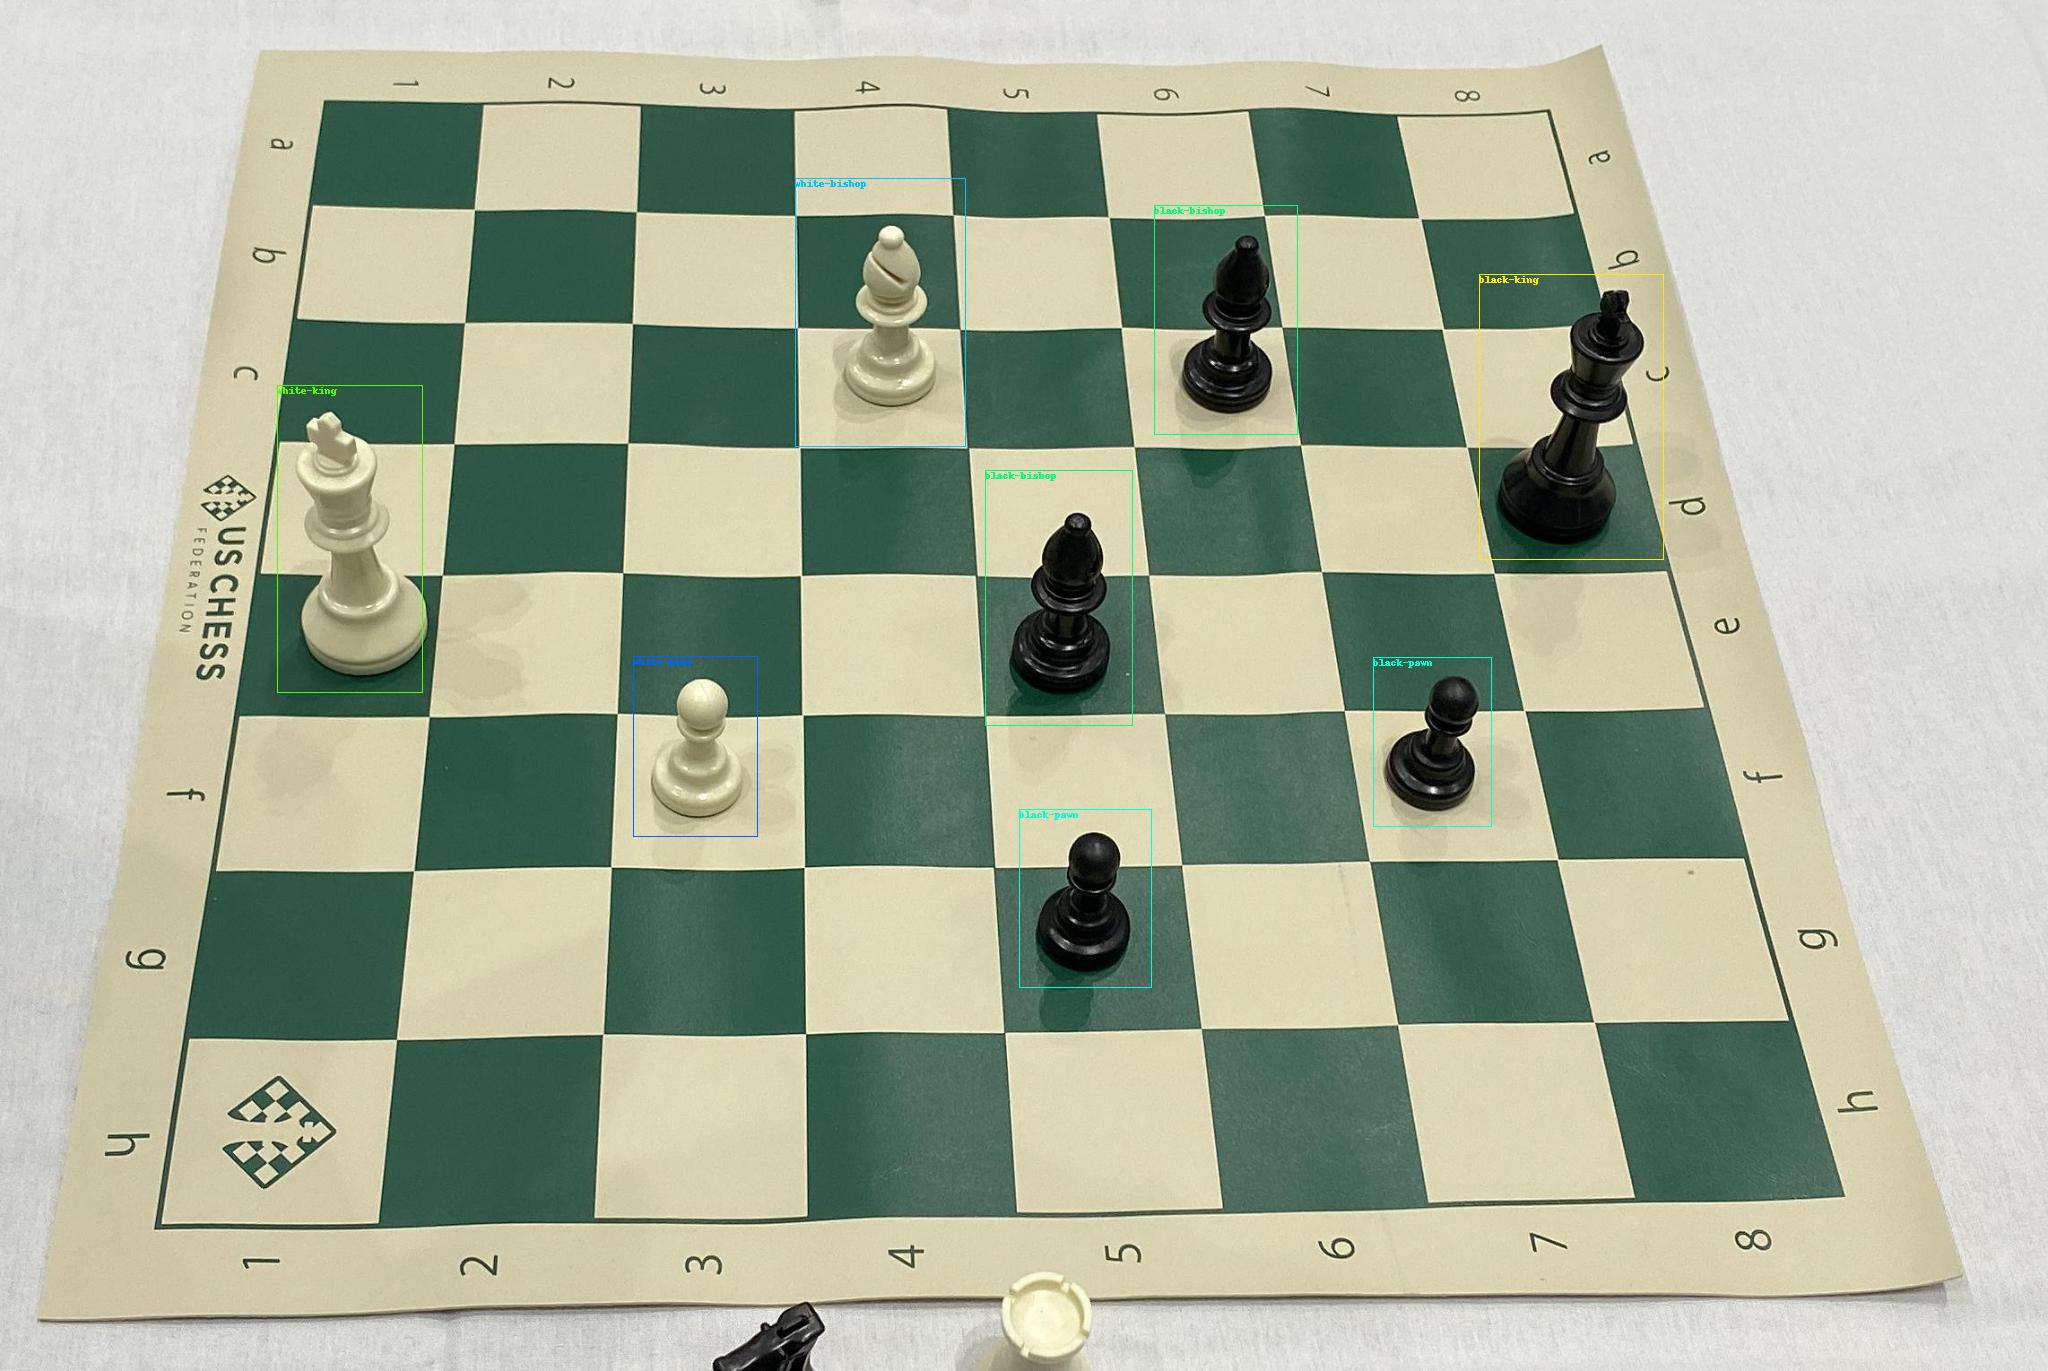

In [ ]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')